# Heart Disease Prediction  

## Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Importing the Dataset

In [3]:
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Taking care of missing values

In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Remove Duplicate Dataset

In [9]:
Duplicate_value = dataset[dataset.duplicated()]
Duplicate_value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df = dataset.drop_duplicates()

In [11]:
df.count()

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

## Know About Target Feature

In [12]:
df.target.unique()

array([1, 0])

In [13]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

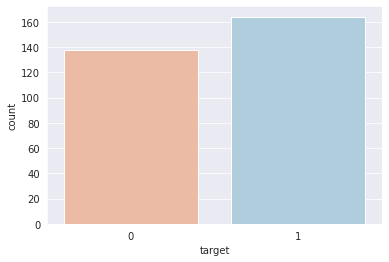

In [14]:
sns.set_style('darkgrid')
sns.countplot(x="target",data=df,palette="RdBu")

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
corrmat = df.corr()
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


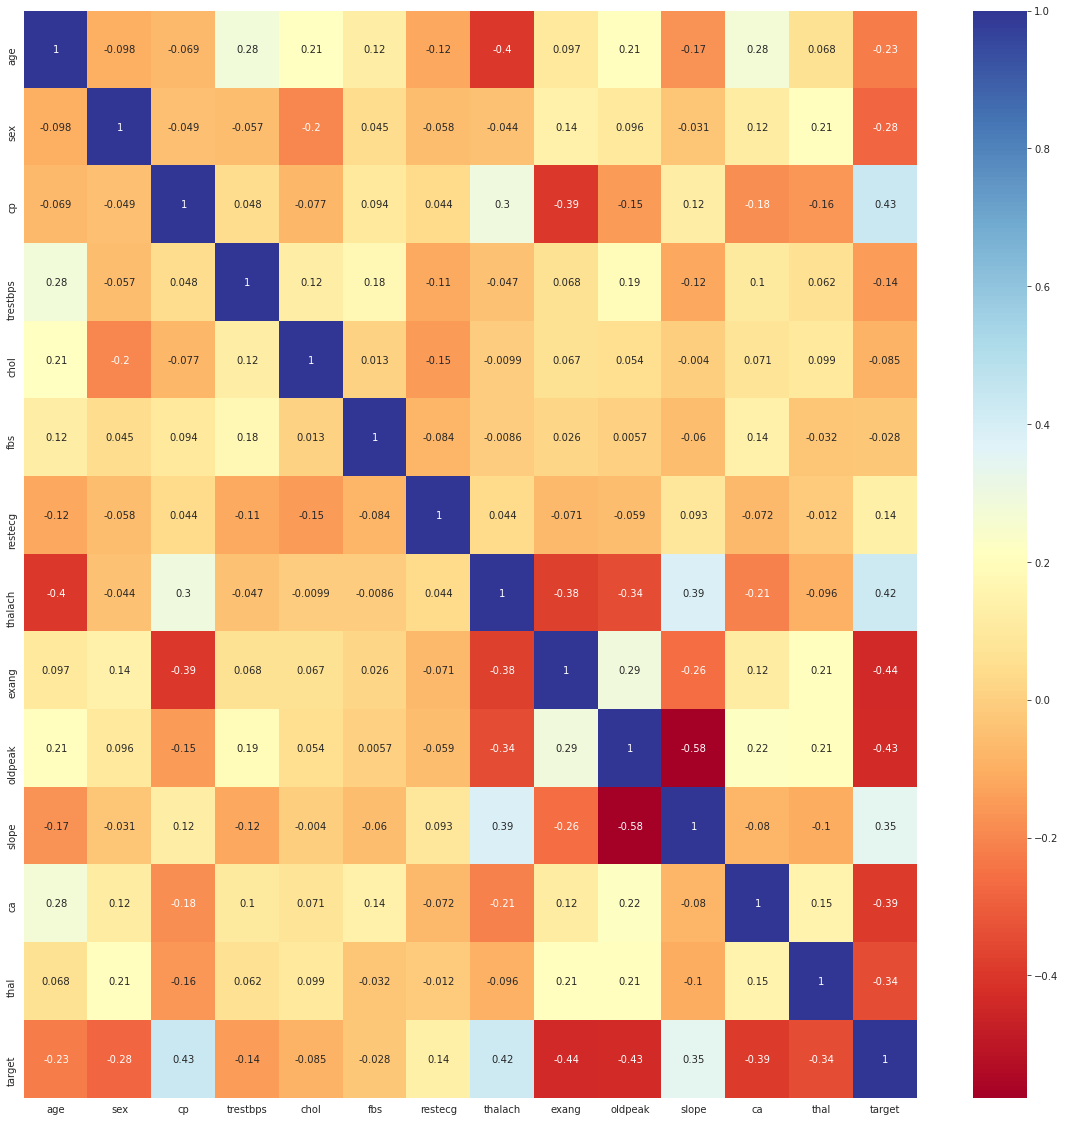

In [17]:
plt.figure(figsize=(20,20))
Heat_map = sns.heatmap(dataset.corr(),annot=True,cmap="RdYlBu")

## Male Female Ratio in Heart Disease

<AxesSubplot:xlabel='sex', ylabel='count'>

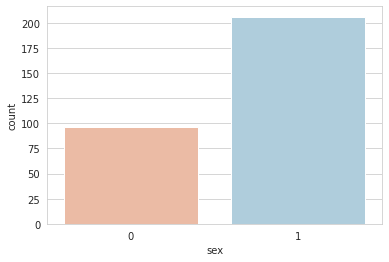

In [25]:
sns.set_style('whitegrid')
sns.countplot(x="sex",data=df,palette="RdBu")

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaling_features = ['age','trestbps','chol','thalach','oldpeak']
df[scaling_features] = sc.fit_transform(df[scaling_features])

<ipython-input-26-c23e771002d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scaling_features] = sc.fit_transform(df[scaling_features])
/home/sourabh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


## Dependent and Independent Variable

In [28]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Split the Dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(302, 13) (226, 13) (76, 13)


In [31]:
print(x_train)

[[-1.04290419  1.          0.         ...  1.          0.
   2.        ]
 [ 0.61767788  0.          3.         ...  2.          0.
   2.        ]
 [-0.6000823   0.          1.         ...  1.          0.
   2.        ]
 ...
 [-2.81419172  1.          1.         ...  2.          0.
   2.        ]
 [ 0.39626693  1.          0.         ...  2.          2.
   3.        ]
 [-0.04655495  1.          2.         ...  2.          0.
   3.        ]]


In [32]:
print(y_train)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0
 0 1 0 1]


## Training the Logistic Regression model on the Training set

In [33]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

## Accuracy Score

In [34]:
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [35]:
print("Training Data Accuracy : ",training_data_accuracy*100)

Training Data Accuracy :  87.16814159292035


## Predicting the Test set results

In [36]:
x_test_prediction = lr.predict(x_test)
print(np.concatenate((x_test_prediction.reshape(len(x_test_prediction),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]]


## Making the Confusion Matrix

In [37]:
cm = confusion_matrix(y_test, x_test_prediction)
print(cm)

[[27  9]
 [ 5 35]]


In [39]:
testing_data_accuracy = accuracy_score(y_test, x_test_prediction)*100
print("Testing Data Accuracy : ",testing_data_accuracy )

Testing Data Accuracy :  81.57894736842105
